In [5]:
# INITIALIZATION OF CERTAIN VARIABLES (verplicht runnen)
import os

# paths and folders:
afstudeerProjectRoot="C:/Users/jkharpatoe/Documents/Afstudeer/AFSTUDEER_MOBILENETV3/"
# testImages= afstudeerProjectRoot + "test images/"
# testButterflyImages= testImages + "butterfly images"
# testNonButterflyImages= testImages + "non butterfly images"

modelKerasPath = afstudeerProjectRoot + "mobilenet_models/"
modelTFLitePath = afstudeerProjectRoot + "mobilenet_models_tflite/"
collectedButterflyImagesPath= afstudeerProjectRoot + "collected_butterfly_images/"
butterflyDatasetImagesPath= afstudeerProjectRoot + "butterfly_dataset_images/"
augmentedButterflyImagesPath= afstudeerProjectRoot + "augmented_butterfly_images/"
trainingAndValidationDatasetFolder ="training_and_validation_data/"
modelTrainingLogsPath= afstudeerProjectRoot + "model_training_logs/"
testButterflyImages = afstudeerProjectRoot + "test_images"
# testNonButterflyImages = afstudeerProjectRoot + "test_images/non butterfly images/"


# AI model name
model_name = "ButterflyModel"

# CREATE TARGET FOLDER
target_folder = afstudeerProjectRoot + trainingAndValidationDatasetFolder
existDataSetPath = os.path.exists(target_folder)

if not existDataSetPath:
  os.mkdir(target_folder)
  print("Target folder created")
else:
  print("Target folder already exists, will not create it!")

Target folder already exists, will not create it!


In [6]:
# NECESSARY FUNCTIONS FOR FOLDERS (verplicht runnen)
import os
import shutil
from pathlib import Path

# important functions used in the project:

# put a directory. if it does not exist, this function will create it
def check_and_create_folder(folder_path):

  if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Map '{folder_path}' is created.")
  else:
    print(f"Map '{folder_path}' already exists.")

def get_all_folders_in_directory(directory_path: str) -> list:
# Initialize an empty list to hold the folder paths
    folder_paths = []

    # List all items in the current directory
    for item in os.listdir(directory_path):
        full_path = os.path.join(directory_path, item)

        # Check if the item is a directory (exclude files)
        if os.path.isdir(full_path):
            print('Folder selected: ' + item)
            folder_paths.append(full_path)

    return folder_paths

def get_categories_butterfly(directory_path: str) -> list:
    butterfly_categories=[]
    folders = get_all_folders_in_directory(directory_path)
    for folder in folders:
        butterfly_categories.append(os.path.basename(os.path.normpath(folder)))
    return butterfly_categories



In [7]:
# DATA PROCESSING PROCESS STARTS HERE
# In deze code worden de categories verzamelt. Deze worden gehaald adv

import os
import random
import shutil

categories = []

categories = get_categories_butterfly(collectedButterflyImagesPath)
print(categories)

# Sort and print categories
categories.sort()
print(categories)



Folder selected: Danaus eresimus
Folder selected: Danaus plexippus
Folder selected: Heliconius antiochus
Folder selected: Heliopetes arsalte
Folder selected: Heraclides thoas
Folder selected: Phoebis argante
['Danaus eresimus', 'Danaus plexippus', 'Heliconius antiochus', 'Heliopetes arsalte', 'Heraclides thoas', 'Phoebis argante']
['Danaus eresimus', 'Danaus plexippus', 'Heliconius antiochus', 'Heliopetes arsalte', 'Heraclides thoas', 'Phoebis argante']


In [ ]:
# Code om uit afbeeldingen testdata te halen
import os
import random
import shutil

def create_test_image_structure(src_dir, dest_dir, num_images):
    """
    Creates a duplicate folder structure from the source directory in the destination directory,
    containing a specified number of randomly selected images from each subfolder.

    Parameters:
    src_dir (str): Path to the source directory containing subfolders with images.
    dest_dir (str): Path to the destination directory where the duplicate structure will be created.
    num_images (int): Number of images to copy from each subfolder.
    """
    # Walk through the source directory
    for root, dirs, files in os.walk(src_dir):
        # Filter image files
        image_files = [file for file in files if file.lower().endswith(('.jpg', '.jpeg', '.png'))]

        # Skip if no images are found in this folder
        if not image_files:
            continue

        # Randomly select images
        selected_images = random.sample(image_files, min(num_images, len(image_files)))

        # Compute relative path and create corresponding folder in destination
        relative_path = os.path.relpath(root, src_dir)
        dest_folder = os.path.join(dest_dir, relative_path)
        os.makedirs(dest_folder, exist_ok=True)

        # Copy selected images to the destination folder
        for image in selected_images:
            src_image_path = os.path.join(root, image)
            dest_image_path = os.path.join(dest_folder, image)
             # Move the file instead of copying
            shutil.move(src_image_path, dest_image_path)
            print(f"Moved {src_image_path} to {dest_image_path}")


# Number of test images to copy per subfolder
number_of_test_images = 5

create_test_image_structure(collectedButterflyImagesPath, testButterflyImages, number_of_test_images)


In [8]:
# FUNCTIONS TO BE USED IN THE FOLLOWING CODES
import os
import glob
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image
def classify_image(imageFile):
  x = []
  img = Image.open(imageFile)

  img.load()
  img = img.resize((320,320))

  x = image.img_to_array(img)
  x= np.expand_dims(x, axis = 0)

  print(x.shape)

  pred = model.predict(x)
  print(pred * 100)

  category_value = np.argmax(pred, axis=1)
  category_value = category_value[0]

  print(category_value)

  result = categories[category_value]

  return result

def classify_image_with_entropicscore(imageFile):
  x = []
  img = Image.open(imageFile)

  img.load()
  img = img.resize((320,320))

  x = image.img_to_array(img)
  x= np.expand_dims(x, axis = 0)


  pred = model.predict(x)

  categoryValue = np.argmax(pred, axis=1)
  categoryValue = categoryValue[0]

  print(categoryValue)

  result = categories[categoryValue]
   # Calculate entropy and entropic score
  entropy = -tf.reduce_sum(pred * tf.math.log(pred + 1e-8), axis=1)
  entropic_score = -entropy

    # Print results for the current image
    # print(f"\nProcessing {butterflyName}:")
    # print("Entropy:", entropy.numpy())
  print(f"Entropic Score of {result}: {entropic_score.numpy()[0]}")

  for output in pred:
      for outputty in output:
          print(f"Prediction: {outputty * 100:.2f}%")

  categoryValue1 = np.argmax(pred, axis=1)[0]
  print(f"Predicted category index: {categoryValue1}", end='\n\n')

  return result



def get_last_modified_model(folder_path: str) -> str:
    # Get all .keras and .tflite files in the folder
    keras_files = glob.glob(os.path.join(folder_path, '*.keras'))
    tflite_files = glob.glob(os.path.join(folder_path, '*.tflite'))

    # Combine both file lists
    files = keras_files + tflite_files

    if not files:
        return None  # No files in the folder

    # Sort files by modification time (latest first)
    latest_file = max(files, key=os.path.getmtime)

    return latest_file

In [ ]:
pip install matplotlib

In [ ]:
pip install tensorflow

In [ ]:
!python.exe -m pip install --upgrade pip

In [ ]:
# Test run (Zonder early stopping)
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import shutil
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import backend as K
import datetime
from tensorflow.keras import models, layers


# nodige vars
# MIN_LR = 0.00005
# MAX_LR = 0.0001
# BATCH_SIZE = 32

numberOfClasses = len(categories)

target_folder = afstudeerProjectRoot + trainingAndValidationDatasetFolder


# Laad dataset met ingebouwde validatie-split
train_ds = tf.keras.utils.image_dataset_from_directory(
    augmentedButterflyImagesPath,
    image_size=(224, 224),
    validation_split=0.2,
    subset='training',
    seed=123
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    augmentedButterflyImagesPath,
    image_size=(224, 224),
    validation_split=0.2,
    subset='validation',
    seed=123
)

%load_ext tensorboard

check_and_create_folder(modelTrainingLogsPath)

if os.path.exists(modelTrainingLogsPath):
    shutil.rmtree(modelTrainingLogsPath)  # Deletes the directory and all its contents
    os.mkdir(modelTrainingLogsPath)

logdir = os.path.join(modelTrainingLogsPath, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)



base_model_mobilenetv3large = MobileNetV3Large(weights='imagenet', include_top=False, input_shape =(224, 224, 3)) #nergens in de literatuur is de input_shape verandert


# Freeze all layers of the base model
for layer in base_model_mobilenetv3large.layers:
    layer.trainable = False
# Add classification layers
model_mobilenetv3large = models.Sequential([
    base_model_mobilenetv3large,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(numberOfClasses, activation='softmax')
])


print(model_mobilenetv3large.summary())

# normalization_layer = tf.keras.layers.Rescaling(1./255)
# # There are two ways to use this layer. You can apply it to the dataset by calling Dataset.map:


# normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_train_ds))
# first_image = image_batch[0]

# Notice the pixel values are now in `[0,1]`.
# print('Notice the pixel values are now in `[0,1]` ')
# print(np.min(first_image), np.max(first_image))

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Compile

model_mobilenetv3large.compile(loss = "sparse_categorical_crossentropy",
              optimizer= 'adam',
              metrics=["accuracy"])

#train
#Veranderen, gewoon de images in folders zetten en dat gebruiken liever

history = model_mobilenetv3large.fit(train_ds, validation_data=val_ds, epochs=1, callbacks=[tensorboard_callback])

# nadat het trainen al is voltooid, worden de nodige metrics displayed op tensorboard
%tensorboard --logdir {logdir}

currentTime = datetime.datetime.now()

modelDateTrained = currentTime.strftime("%Y-%m-%d_%H_%M")

modelSavedPath = modelKerasPath + f'__{modelDateTrained}.keras'

try:
    os.remove(modelSavedPath)
    print(f"File '{modelSavedPath}' has been removed.")
except FileNotFoundError:
    print(f"File '{modelSavedPath}' does not exist.")
except PermissionError:
    print(f"Permission denied: Unable to delete '{modelSavedPath}'.")
except OSError as e:
    print(f"Error: {e.strerror} - {e.filename}")

#save the keras model
model_mobilenetv3large.save(modelSavedPath)

model= tf.keras.models.load_model(modelSavedPath)

# Converting to TF lite
try:
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    model_mobilenetv3large_tflite = converter.convert()
    print("Model converted successfully.")
except Exception as e:
    print(f"Error during conversion: {e}")

currentTime = datetime.datetime.now()

modelDateTrained = currentTime.strftime("%Y-%m-%d_%H_%M")

model_mobilenetv3large_tflite_path = modelTFLitePath + f'__{modelDateTrained}.tflite'

try:
    os.remove(model_mobilenetv3large_tflite_path)
    print(f"File '{model_mobilenetv3large_tflite_path}' has been removed.")
except FileNotFoundError:
    print(f"File '{model_mobilenetv3large_tflite_path}' does not exist.")
except PermissionError:
    print(f"Permission denied: Unable to delete '{model_mobilenetv3large_tflite_path}'.")
except OSError as e:
    print(f"Error: {e.strerror} - {e.filename}")



# Save the tf-lite model.
with open(model_mobilenetv3large_tflite_path, 'wb') as f:
  f.write(model_mobilenetv3large_tflite)



In [ ]:
# Default training (wat ik had voor grondig onderzoek)
# met CLR methode
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import shutil
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import backend as K
import datetime

# nodige vars
MIN_LR = 0.00005
MAX_LR = 0.0001
BATCH_SIZE = 32

numberOfClasses = len(categories)

target_folder = afstudeerProjectRoot + trainingAndValidationDatasetFolder

trainPath = target_folder +"/train/";
validatePath = target_folder +"/validate/";

# trainGenerator = ImageDataGenerator(
#     rotation_range=15, width_shift_range=0.1,
#     height_shift_range=0.1,
#     brightness_range=(0, 0.2)).flow_from_directory(trainPath,
#                                                    target_size=(320,320),
#                                                    batch_size=32)

# validateGenerator = ImageDataGenerator(
#     rotation_range=15, width_shift_range=0.1,
#     height_shift_range=0.1,
#     brightness_range=(0, 0.2)).flow_from_directory(validatePath,
#                                                    target_size=(320,320),
#                                                    batch_size=32)
num_images = trainGenerator.n
BATCH = trainGenerator.batch_size
STEPS_PER_EPOCH = np.ceil(num_images / BATCH)
STEP_SIZE = STEPS_PER_EPOCH * 8



previously_trained_model_path = get_last_modified_model(modelKerasPath)


%load_ext tensorboard



check_and_create_folder(modelTrainingLogsPath)

if os.path.exists(modelTrainingLogsPath):
    shutil.rmtree(modelTrainingLogsPath)  # Deletes the directory and all its contents
    os.mkdir(modelTrainingLogsPath)

logdir = os.path.join(modelTrainingLogsPath, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

earlyStoppingCallback = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=10,
                              verbose=0,
                              mode='auto',
                              restore_best_weights=True)

# deze functie regelt de learning rate tijdens runtime volgens de Cyclic rate methode (traingular algoritme)
def scheduler(epoch, lr):
  total_steps = epoch * STEPS_PER_EPOCH
  cycle = np.floor(1 + total_steps / (2 * STEP_SIZE))
  x = np.abs(total_steps / STEP_SIZE - 2 * cycle + 1)
  lr = MIN_LR + (MAX_LR - MIN_LR) * np.maximum(0, (1 - x))
  return lr

# input shape is gezet op 320,320,3 (eerste 2 zijn height en width, 3e is de color channel)
# model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(320, 320, 3)) # include_top=False haalt de laatste layer weg (classification layer)

model = MobileNetV3Small(weights='imagenet', include_top=False) #nergens in de literatuur is de input_shape verandert
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation ='relu')(x)
x = Dense(256, activation ='relu')(x)
x = Dense(128, activation ='relu')(x)

#deze laatste 5 layers zijn zelf geadd
predictionLayer = Sequential([  # Add an intermediate layer if needed
    Dense(numberOfClasses, activation='softmax')
])(x)


model = tf.keras.Model(inputs=model.input, outputs=predictionLayer)

# if USE_PREVIOUSLY_TRAINED_MODEL:
#     # Load the pre-trained model from the saved file
#     baseModel = tf.keras.models.load_model(previously_trained_model_path)
#     print(f"Loaded pre-trained model from {previously_trained_model_path}")
# else:
#     # Use MobileNetV3Small as the base model
#     baseModel = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(320, 320, 3))
#     print("Using MobileNetV3Small as the base model")

# print(model.summary())

# freeze the layers of the model that are already trained


# for layer in model.layers[:-5]: # Train de laatste 5 layers
#   layer.trainable = False


# Compile
callbackLearningRate = tf.keras.callbacks.LearningRateScheduler(scheduler)

optimizer = Adam(learning_rate = MIN_LR)
model.compile(loss = "categorical_crossentropy",
              optimizer= optimizer,
              metrics=["accuracy"])

#train
#Veranderen, gewoon de images in folders zetten en dat gebruiken liever
model.fit(trainGenerator, validation_data= validateGenerator,epochs=100, callbacks=[tensorboard_callback, earlyStoppingCallback,callbackLearningRate])

# nadat het trainen al is voltooid, worden de nodige metrics displayed op tensorboard
%tensorboard --logdir {logdir}

currentTime = datetime.datetime.now()

modelDateTrained = currentTime.strftime("%Y-%m-%d_%H_%M")

modelSavedPath = modelKerasPath + f'__{modelDateTrained}.keras'


try:
    os.remove(modelSavedPath)
    print(f"File '{modelSavedPath}' has been removed.")
except FileNotFoundError:
    print(f"File '{modelSavedPath}' does not exist.")
except PermissionError:
    print(f"Permission denied: Unable to delete '{modelSavedPath}'.")
except OSError as e:
    print(f"Error: {e.strerror} - {e.filename}")


model.save(modelSavedPath) #https://www.tensorflow.org/tutorials/keras/save_and_load#new_high-level_keras_format

In [ ]:
# Feature extraction methode (volgens PDF met code implementatie)
# Zonder CLR
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import shutil
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import backend as K
import datetime

# nodige vars
# MIN_LR = 0.00005
# MAX_LR = 0.0001
# BATCH_SIZE = 32

numberOfClasses = len(categories)

target_folder = afstudeerProjectRoot + trainingAndValidationDatasetFolder

trainPath = target_folder +"/train/";
validatePath = target_folder +"/validate/";
train_ds = tf.keras.utils.image_dataset_from_directory(
    trainPath,
    image_size=(224,224))
val_ds = tf.keras.utils.image_dataset_from_directory(
    validatePath, # Volledige validatieset in 1 batch
    image_size=(224,224))


%load_ext tensorboard

check_and_create_folder(modelTrainingLogsPath)

if os.path.exists(modelTrainingLogsPath):
    shutil.rmtree(modelTrainingLogsPath)  # Deletes the directory and all its contents
    os.mkdir(modelTrainingLogsPath)

logdir = os.path.join(modelTrainingLogsPath, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

earlyStoppingCallback = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=10,
                              verbose=0,
                              mode='auto',
                              restore_best_weights=True)

# input shape is gezet op 320,320,3 (eerste 2 zijn height en width, 3e is de color channel)
# model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(320, 320, 3)) # include_top=False haalt de laatste layer weg (classification layer)

base_model_mobilenetv3large = MobileNetV3Small(weights='imagenet', include_top=False) #nergens in de literatuur is de input_shape verandert


# Freeze all layers of the base model
for layer in base_model_mobilenetv3large.layers:
    layer.trainable = False
# Add classification layers
model_mobilenetv3large = models.Sequential([
base_model_mobilenetv3large,
layers.GlobalAveragePooling2D(),
layers.Dense(256, activation='relu'),
layers.Dense(10, activation='softmax')
])



print(model_mobilenetv3large.summary())



# Compile
optimizer = Adam(learning_rate = 0.001)
model_mobilenetv3large.compile(loss = "categorical_crossentropy",
              optimizer= optimizer,
              metrics=["accuracy"])

#train
#Veranderen, gewoon de images in folders zetten en dat gebruiken liever
history = model.fit(train_ds, validation_data= val_ds, epochs=100, callbacks=[tensorboard_callback, earlyStoppingCallback])

# nadat het trainen al is voltooid, worden de nodige metrics displayed op tensorboard
%tensorboard --logdir {logdir}

currentTime = datetime.datetime.now()

modelDateTrained = currentTime.strftime("%Y-%m-%d_%H_%M")

modelSavedPath = modelKerasPath + f'__{modelDateTrained}.keras'


try:
    os.remove(modelSavedPath)
    print(f"File '{modelSavedPath}' has been removed.")
except FileNotFoundError:
    print(f"File '{modelSavedPath}' does not exist.")
except PermissionError:
    print(f"Permission denied: Unable to delete '{modelSavedPath}'.")
except OSError as e:
    print(f"Error: {e.strerror} - {e.filename}")




model.save(modelSavedPath) #https://www.tensorflow.org/tutorials/keras/save_and_load#new_high-level_keras_format

Found 180 files belonging to 6 classes.
6/6 [==============================] - 3s 399ms/step
y_pred_probabilities
[[5.9020978e-01 4.0889129e-01 1.2708994e-04 3.8631522e-05 7.3275325e-04
  5.1730234e-07]
 [9.5928800e-01 4.0630471e-02 1.6521912e-05 1.4298986e-05 5.0542774e-05
  2.8825497e-07]
 [9.3112940e-01 6.6693708e-02 5.9906812e-05 4.2531894e-05 2.0740957e-03
  3.8027295e-07]
 ...
 [5.9452345e-06 3.2860884e-05 1.3544080e-05 6.5643115e-05 2.1953621e-05
  9.9986005e-01]
 [6.1520201e-05 4.0444513e-05 2.6067508e-05 1.8692171e-04 2.3434583e-05
  9.9966156e-01]
 [1.9174553e-02 9.9008828e-03 3.6175190e-03 1.6592950e-02 9.7825611e-03
  9.4093144e-01]]
y_pred
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 

NameError: name 'modelSavedPath' is not defined

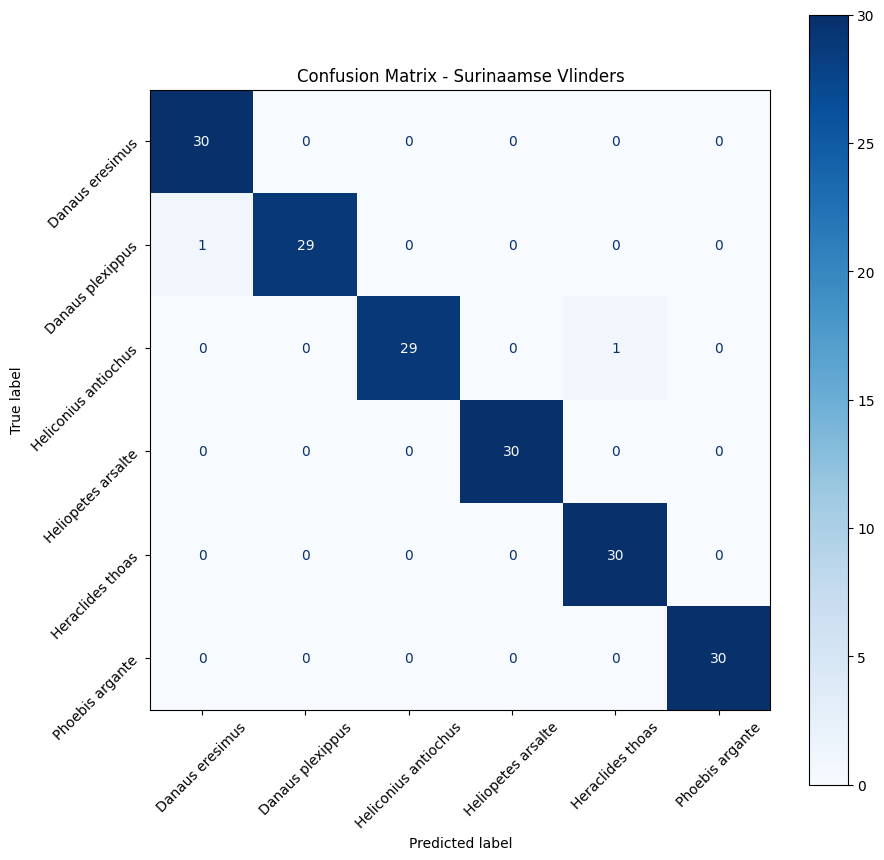

In [9]:
# Confusion Matrix voor tensorflow model (ziet er goed uit?)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime

# Maakt een x,y dataset.
# TODO: maak een aparte test dataset
val_ds_for_predictions = tf.keras.utils.image_dataset_from_directory(
    testButterflyImages,
    image_size=(224, 224),
    shuffle=False,  # Belangrijk voor consistente volgorde
    batch_size=32
)


model_path= get_last_modified_model(modelKerasPath)

model_mobilenetv3large= tf.keras.models.load_model(model_path)

y_pred_probabilities = model_mobilenetv3large.predict(val_ds_for_predictions) #hier gebruikt het x en y, nagaan of het correct is om hier ook labels te gebruiken. Je zou eig. alleen invoer images (x) moeten gebruiken.
print("y_pred_probabilities")
print(y_pred_probabilities)

# geeft per voorspelde afbeelding de hoogste prediction (in label/index waarde)
y_pred = np.argmax(y_pred_probabilities, axis=1)
print("y_pred")
print(y_pred)

# Verzamel de werkelijke labels
true_labels = np.concatenate([y for _, y in val_ds_for_predictions], axis=0)
print("true_labels")
print(true_labels)

# Maak de confusion matrix
cm = confusion_matrix(true_labels, y_pred)

# Visualiseer de confusion matrix met schuine labels
class_names = list(categories)  # Gebruik de naamlijst van vlindersoorten om te koppelen aan indexes (y-waardes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix - Surinaamse Vlinders')
plt.xticks(rotation=45)  # Schuine labels op x-as
plt.yticks(rotation=45)  # Schuine labels op y-as
currentTime = datetime.datetime.now()
modelDateTrained = currentTime.strftime("%Y-%m-%d_%H_%M")
plt.savefig(f"{model_path}_confusion_matrix_{modelDateTrained}.png")
plt.show()


In [ ]:
!pip uninstall scikit-learn

In [ ]:
!python -m pip install --upgrade pip setuptools wheel

In [ ]:
!pip install --only-binary :all: numpy scipy

In [ ]:
!pip install --only-binary :all: scikit-learn

In [ ]:
!pip3 install -U scikit-learn scipy matplotlib

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os
import datetime

# Obtain the latest saved model path
modelSavedPath = get_last_modified_model(modelTFLitePath)

# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=modelSavedPath)
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Print input details to understand expected shape
print("Input details:", input_details)
expected_shape = input_details[0]['shape']
print(f"Expected input shape: {expected_shape}")

# Create validation dataset
val_ds_for_predictions = tf.keras.utils.image_dataset_from_directory(
    testButterflyImages,
    image_size=(224, 224),
    shuffle=False,
    batch_size=32
)

# Store predictions
y_pred = []

# Process each batch
for batch_images, batch_labels in val_ds_for_predictions:
    batch_predictions = []
    for image in batch_images:
        # Resize the image to match the model's expected input dimensions
        # This assumes your model expects a specific size, adjust as needed
        resized_image = tf.image.resize(image, [expected_shape[1], expected_shape[2]])
        resized_image = np.array(resized_image).astype(np.float32)

        # Add batch dimension
        input_data = np.expand_dims(img, axis=0)


        # Ensure correct shape and data type
        # input_data = tf.expand_dims(resized_image, axis=0).numpy().astype(input_details[0]['dtype'])

        # Alternatively, if the model expects specific exact dimensions:
        # input_data = np.reshape(input_data, expected_shape)

        # Set the input tensor
        interpreter.set_tensor(input_details[0]['index'], input_data)

        # Run inference
        interpreter.invoke()

        # Get output
        output_details_output = interpreter.get_output_details()
        output_data = interpreter.get_tensor(output_details_output[0]['index'])
        batch_predictions.append(np.squeeze(output_data))

    # Process batch predictions
    batch_predictions = np.array(batch_predictions)
    y_pred.extend(np.argmax(batch_predictions, axis=1))

# Convert to numpy array
y_pred = np.array(y_pred)
print("Predicted labels (y_pred):", y_pred)

# Get true labels
true_labels = np.concatenate([y.numpy() for _, y in val_ds_for_predictions], axis=0)
print("True labels (true_labels):", true_labels)

# Create confusion matrix
cm = confusion_matrix(true_labels, y_pred)

# Visualize confusion matrix
class_names = list(categories)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix - Surinaamse Vlinders')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

modelDateTrained = currentTime.strftime("%Y-%m-%d_%H_%M")
plt.savefig(f"{modelSavedPath}_confusion_matrix_{modelDateTrained}.png")
plt.show()


In [ ]:
# Confusion Matrix voor tensorflow model (ziet er goed uit?)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path=model_mobilenetv3large_tflite_path+model_mobilenetv3large_tflite)

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

interpreter.allocate_tensors()

# input details
print(input_details)
# output details
print(output_details)



# y_pred_probabilities = model_mobilenetv3large.predict(val_ds_for_predictions) #hier gebruikt het x en y, nagaan of het correct is om hier ook labels te gebruiken. Je zou eig. alleen invoer images (x) moeten gebruiken.
# print("y_pred_probabilities")
# print(y_pred_probabilities)

# # geeft per voorspelde afbeelding de hoogste prediction (in label/index waarde)
# y_pred = np.argmax(y_pred_probabilities, axis=1)
# print("y_pred")
# print(y_pred)

# # Verzamel de werkelijke labels
# true_labels = np.concatenate([y for _, y in val_ds_for_predictions], axis=0)
# print("true_labels")
# print(true_labels)

# # Maak de confusion matrix
# cm = confusion_matrix(true_labels, y_pred)

# # Visualiseer de confusion matrix met schuine labels
# class_names = list(categories)  # Gebruik de naamlijst van vlindersoorten om te koppelen aan indexes (y-waardes)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
# fig, ax = plt.subplots(figsize=(10, 10))
# disp.plot(cmap=plt.cm.Blues, ax=ax)
# plt.title('Confusion Matrix - Surinaamse Vlinders')
# plt.xticks(rotation=45)  # Schuine labels op x-as
# plt.yticks(rotation=45)  # Schuine labels op y-as
# plt.savefig(f"{modelSavedPath}_confusion_matrix_{modelDateTrained}.png")
# plt.show()


In [ ]:
import tensorflow as tf
import cv2

modelSavedPath= get_last_modified_model("C:/Users/jkharpatoe/Documents/Afstudeer/mobilenet_models/")
model= tf.keras.models.load_model(modelSavedPath)

image_directory = "C:/Users/jkharpatoe/Documents/Afstudeer/cropped_images/"

# Loop through all images in the directory
for filename in os.listdir(image_directory):
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):  # Check for image file extensions
        img_path = os.path.join(image_directory, filename)
        resultText = classify_image_with_entropicscore(img_path)
        print(f"Image: {filename}, Predicted Class: {resultText}")

In [ ]:
# CONVERT MODEL TO TFLITE

import tensorflow as tf
import os
import datetime


modelSavedPath= get_last_modified_model(modelKerasPath)
model= tf.keras.models.load_model(modelSavedPath)
# # Convert the model

converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]


# # Explicitly set the input shape (matching your ImageDataGenerator)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
# input_shape = [1, 320, 320, 3]
# converter.inference_input_shape = input_shape

# tflite_model = converter.convert()
# path to the SavedModel directory
try:
    tflite_model = converter.convert()
    print("Model converted successfully.")
except Exception as e:
    print(f"Error during conversion: {e}")

currentTime = datetime.datetime.now()

modelDateTrained = currentTime.strftime("%Y-%m-%d_%H:%M")

tflite_model_path = modelTFLitePath + f'__{modelDateTrained}.tflite'

try:
    os.remove(tflite_model_path)
    print(f"File '{tflite_model_path}' has been removed.")
except FileNotFoundError:
    print(f"File '{tflite_model_path}' does not exist.")
except PermissionError:
    print(f"Permission denied: Unable to delete '{tflite_model_path}'.")
except OSError as e:
    print(f"Error: {e.strerror} - {e.filename}")

# Save the model.
with open(tflite_model_path, 'wb') as f:
  f.write(tflite_model)